# ML Project on the Classification of Mushrooms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing,tree
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df=pd.read_csv("mushroom_data.csv")
df.shape

(61069, 21)

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
le_cap_shape=preprocessing.LabelEncoder()
le_cap_shape.fit(df['cap-shape'])
df['cap-shape']=le_cap_shape.transform(df['cap-shape'])

le_cap_surface=preprocessing.LabelEncoder()
le_cap_surface.fit(df['cap-surface'])
df['cap-surface']=le_cap_surface.transform(df['cap-surface'])

le_cap_color=preprocessing.LabelEncoder()
le_cap_color.fit(df['cap-color'])
df['cap-color']=le_cap_color.transform(df['cap-color'])

le_gill_color=preprocessing.LabelEncoder()
le_gill_color.fit(df['gill-color'])
df['gill-color']=le_gill_color.transform(df['gill-color'])

le_stem_color=preprocessing.LabelEncoder()
le_stem_color.fit(df['stem-color'])
df['stem-color']=le_stem_color.transform(df['stem-color'])

le_has_ring=preprocessing.LabelEncoder()
le_has_ring.fit(df['has-ring'])
df['has-ring']=le_has_ring.transform(df['has-ring'])

le_habitat=preprocessing.LabelEncoder()
le_habitat.fit(df['habitat'])
df['habitat']=le_habitat.transform(df['habitat'])

le_class=preprocessing.LabelEncoder()
le_class.fit(df['class'])
df['class']=le_class.transform(df['class'])

le_does_bruise=preprocessing.LabelEncoder()
le_does_bruise.fit(df['does-bruise-or-bleed'])
df['does-bruise-or-bleed']=le_does_bruise.transform(df['does-bruise-or-bleed'])

le_gill_attachment=preprocessing.LabelEncoder()
le_gill_attachment.fit(df['gill-attachment'])
df['gill-attachment']=le_gill_attachment.transform(df['gill-attachment'])

le_stem_root=preprocessing.LabelEncoder()
le_stem_root.fit(df['stem-root'])
df['stem-root']=le_stem_root.transform(df['stem-root'])

le_stem_surface=preprocessing.LabelEncoder()
le_stem_surface.fit(df['stem-surface'])
df['stem-surface']=le_stem_surface.transform(df['stem-surface'])

le_veil_type=preprocessing.LabelEncoder()
le_veil_type.fit(df['veil-type'])
df['veil-type']=le_veil_type.transform(df['veil-type'])

le_veil_color=preprocessing.LabelEncoder()
le_veil_color.fit(df['veil-color'])
df['veil-color']=le_veil_color.transform(df['veil-color'])

le_ring_type=preprocessing.LabelEncoder()
le_ring_type.fit(df['ring-type'])
df['ring-type']=le_ring_type.transform(df['ring-type'])

le_season=preprocessing.LabelEncoder()
le_season.fit(df['season'])
df['season']=le_season.transform(df['season'])


In [5]:
df=df.drop(['gill-spacing','spore-print-color'],axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,10,16.95,17.09,4,7,11,0,4,1,2,0,3
1,1,16.60,6,2,6,0,2,10,17.99,18.19,4,7,11,0,4,1,2,0,2
2,1,14.07,6,2,6,0,2,10,17.80,17.74,4,7,11,0,4,1,2,0,3
3,1,14.17,2,3,1,0,2,10,15.77,15.98,4,7,11,0,4,1,5,0,3
4,1,14.64,6,3,6,0,2,10,16.53,17.20,4,7,11,0,4,1,5,0,3


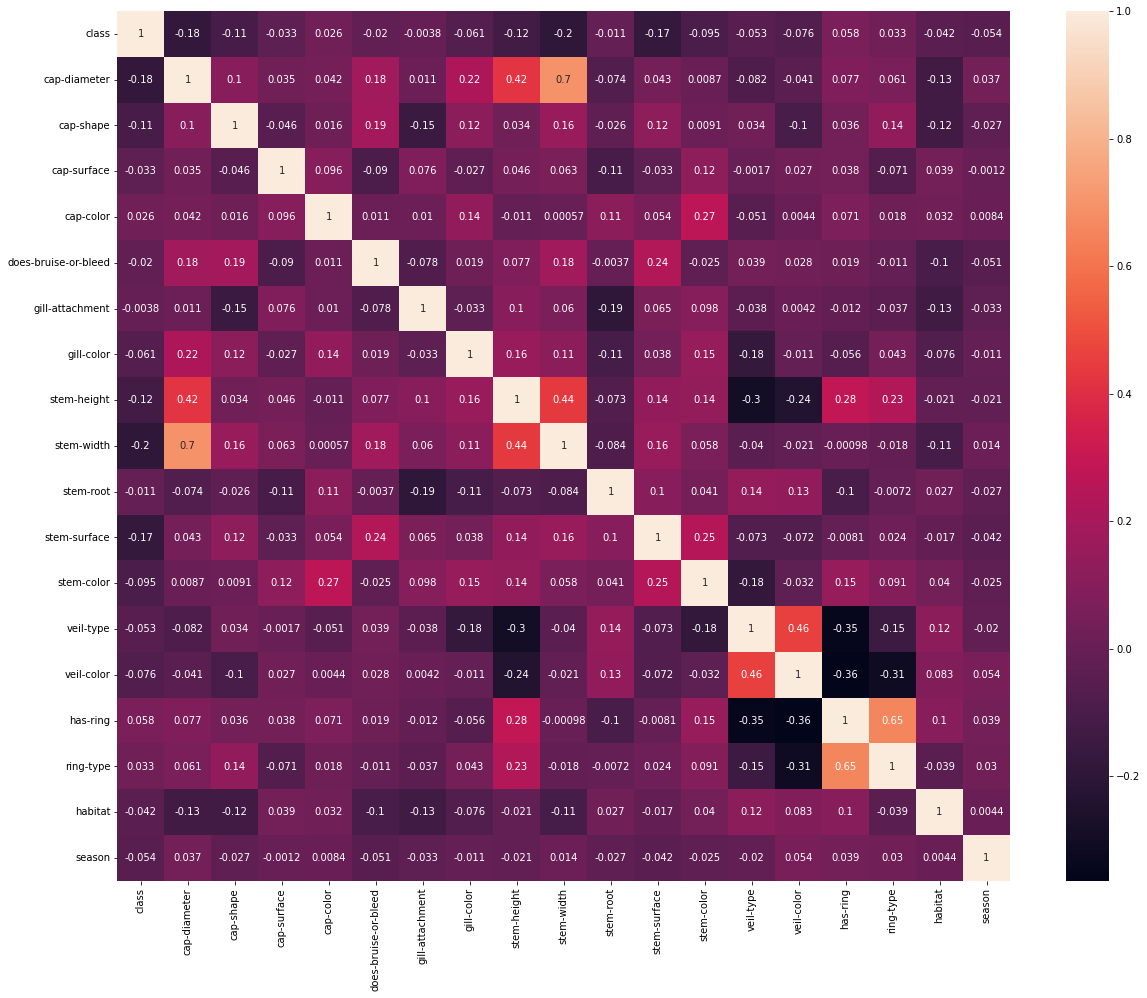

In [6]:
f, ax = plt.subplots(figsize=(20, 16))
corr = df.corr()
sn.heatmap(corr, annot=True)
plt.show()

### Extracting only required attributes

In [7]:
cdf=df[['cap-diameter','cap-shape','cap-surface','cap-color','gill-color','stem-height','stem-width','stem-color','has-ring','habitat','class']]
cdf.head()

,cap-diameter,cap-shape,cap-surface,cap-color,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,class
0,15.26,6,2,6,10,16.95,17.09,11,1,0,1
1,16.60,6,2,6,10,17.99,18.19,11,1,0,1
2,14.07,6,2,6,10,17.80,17.74,11,1,0,1
3,14.17,2,3,1,10,15.77,15.98,11,1,0,1
4,14.64,6,3,6,10,16.53,17.20,11,1,0,1


### Dropping Rows with NA values

In [8]:
cdf.dropna(inplace=True)
cdf.reset_index(drop=True,inplace=True)
cdf

/var/folders/8m/m1lrctr135n9092zn9c737jh0000gn/T/ipykernel_76792/4267188427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(inplace=True)


,cap-diameter,cap-shape,cap-surface,cap-color,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,class
0,15.26,6,2,6,10,16.95,17.09,11,1,0,1
1,16.60,6,2,6,10,17.99,18.19,11,1,0,1
2,14.07,6,2,6,10,17.80,17.74,11,1,0,1
3,14.17,2,3,1,10,15.77,15.98,11,1,0,1
4,14.64,6,3,6,10,16.53,17.20,11,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,5,7,11,2,3.93,6.22,12,0,0,1
61065,1.27,2,7,11,2,3.18,5.43,12,0,0,1
61066,1.27,5,7,11,2,3.86,6.37,12,0,0,1
61067,1.24,2,7,11,2,3.56,5.44,12,0,0,1


### Plotting numeric based attributes on histogram

array([[<AxesSubplot:title={'center':'cap-diameter'}>,
        <AxesSubplot:title={'center':'stem-height'}>],
       [<AxesSubplot:title={'center':'stem-width'}>, <AxesSubplot:>]],
      dtype=object)

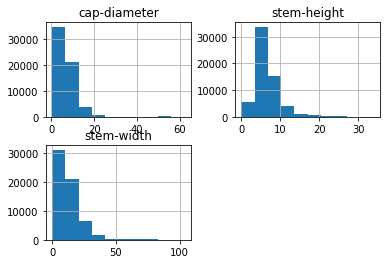

In [9]:
cdf[['cap-diameter','stem-height','stem-width']].hist()

### Splitting Dataset

In [10]:
X_train, X_test,Y_train,Y_test = train_test_split(cdf[['cap-diameter','cap-shape','cap-surface','cap-color','gill-color','stem-height','stem-width','stem-color','has-ring','habitat']],cdf['class'],test_size=0.2,random_state=0)

## Naive Bayes Model

In [11]:
NB_model = GaussianNB()
NB_model.fit(X_train,Y_train)

GaussianNB()

In [12]:
Y_hat_NB=NB_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_NB)*100))
print(classification_report(Y_test,Y_hat_NB))

Accuracy : 59.169805141640744%
              precision    recall  f1-score   support

           0       0.55      0.31      0.39      5302
           1       0.60      0.81      0.69      6912

    accuracy                           0.59     12214
   macro avg       0.58      0.56      0.54     12214
weighted avg       0.58      0.59      0.56     12214



### Confusion matrix

Text(24.0, 0.5, 'Actual')

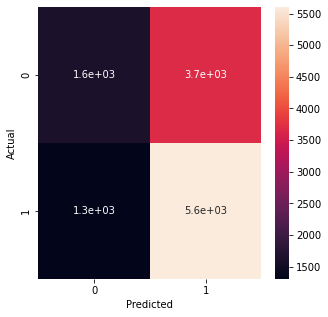

In [13]:
cm=confusion_matrix(Y_test,Y_hat_NB)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Logistic Regression Model

In [14]:
LR_model = LogisticRegression(C=0.01,solver='sag')
LR_model.fit(X_train,Y_train)

LogisticRegression(C=0.01, solver='sag')

In [15]:
Y_hat_LR=LR_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_LR)*100))
print(classification_report(Y_test,Y_hat_LR))

Accuracy : 63.05059767479941%
              precision    recall  f1-score   support

           0       0.60      0.44      0.51      5302
           1       0.64      0.78      0.70      6912

    accuracy                           0.63     12214
   macro avg       0.62      0.61      0.61     12214
weighted avg       0.63      0.63      0.62     12214



### Confusion Matrix

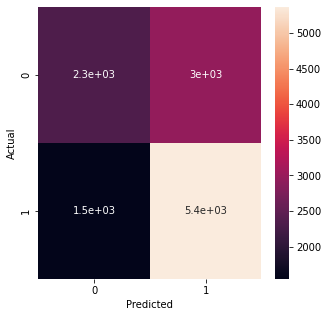

In [16]:
cm=confusion_matrix(Y_test,Y_hat_LR)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN Model

In [17]:
Ks=10                                                 # INCREASE THE VALUE OF K TO 100
train_accuracy =np.zeros((Ks-1))
test_accuracy = np.zeros((Ks-1))
mean_acc=np.zeros((Ks-1))
for n in range(5,Ks):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,Y_train)
    Y_hat_knn=knn.predict(X_test)
    mean_acc[n-1]=accuracy_score(Y_test,Y_hat_knn)
    train_accuracy[n-1] = knn.score(X_train, Y_train)
    test_accuracy[n-1] = knn.score(X_test, Y_test)
print("Max accuracy is: ",mean_acc.max(),"with k=",mean_acc.argmax()+1)




Max accuracy is:  0.9936138857049288 with k= 5


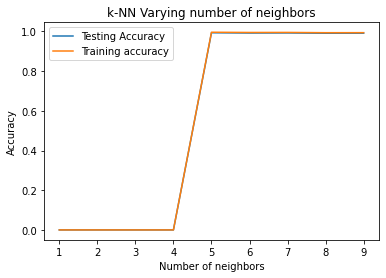

In [18]:
empty= np.arange(1,10)
plt.title('k-NN Varying number of neighbors')
plt.plot(empty, test_accuracy, label='Testing Accuracy')
plt.plot(empty, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
KNN_model=KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1)
KNN_model.fit(X_train,Y_train)
Y_hat_KNN=KNN_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_KNN)*100))
print(classification_report(Y_test,Y_hat_KNN))


Accuracy : 99.36138857049288%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5302
           1       1.00      0.99      0.99      6912

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



### Roc-Auc Curve

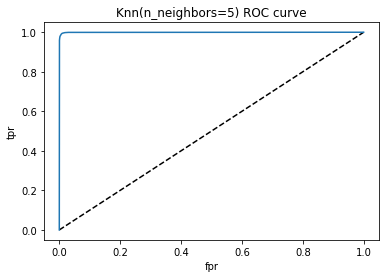

In [20]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

### Roc-Auc Score

In [21]:
roc_auc_score(Y_test,y_pred_proba)

0.9991711559317238

### Confusion Matrix

Text(24.0, 0.5, 'Actual')

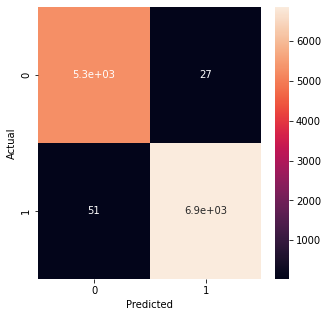

In [22]:
cm=confusion_matrix(Y_test,Y_hat_KNN)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Random Forest Model

In [23]:

RF_model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)
RF_model.fit(X_train,Y_train)
Y_hat_RF=RF_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_RF)*100))
print(classification_report(Y_test,Y_hat_RF))



Accuracy : 96.30751596528575%
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5302
           1       0.99      0.95      0.97      6912

    accuracy                           0.96     12214
   macro avg       0.96      0.97      0.96     12214
weighted avg       0.96      0.96      0.96     12214



### Confusion matrix

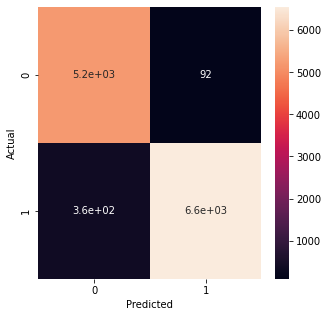

In [24]:
cm=confusion_matrix(Y_test,Y_hat_RF)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [25]:
DT_model = DecisionTreeClassifier(max_depth=10,random_state=0)
DT_model.fit(X_train,Y_train)
Y_hat_DT=DT_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_DT)*100))
print(classification_report(Y_test,Y_hat_DT))


Accuracy : 88.84886196168331%
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5302
           1       0.90      0.91      0.90      6912

    accuracy                           0.89     12214
   macro avg       0.89      0.89      0.89     12214
weighted avg       0.89      0.89      0.89     12214



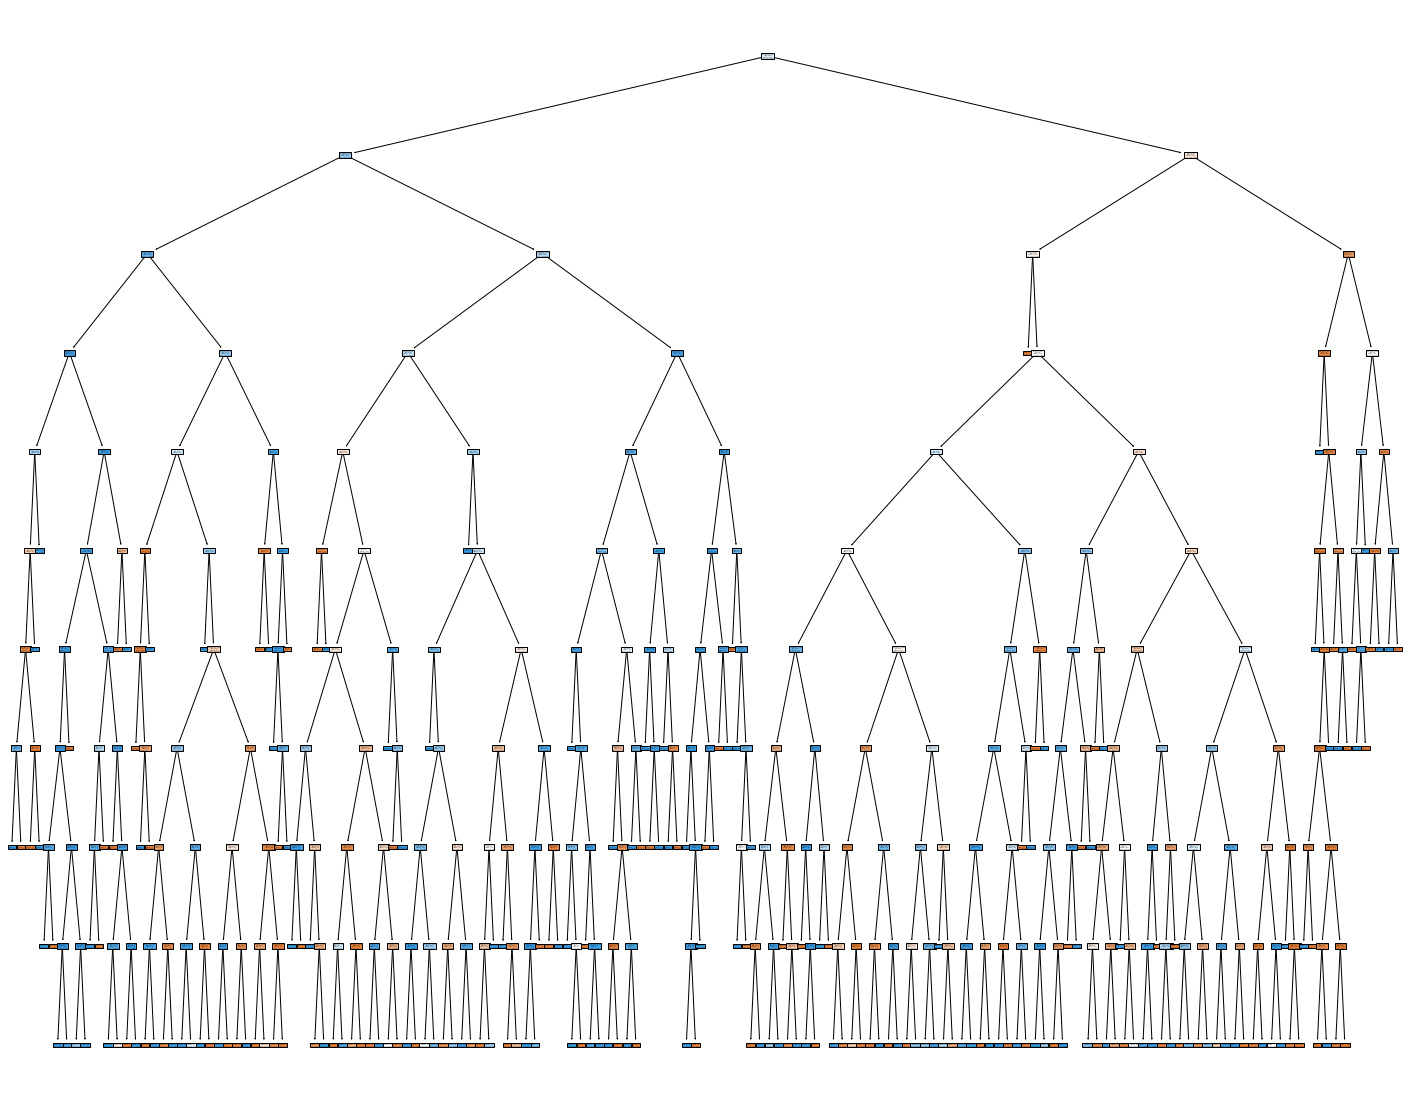

In [26]:
feature_names=cdf.columns[:-1]
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT_model,feature_names=feature_names,filled=True)
fig.savefig('DT.png')
plt.show()

### Confusion Matrix

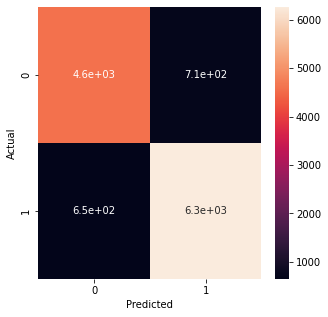

In [27]:
cm=confusion_matrix(Y_test,Y_hat_DT)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## DL Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
DL=Sequential()
DL.add(Dense(10,activation='relu',input_dim=10))
DL.add(Dense(units=12,activation='relu'))
DL.add(Dense(2,activation='softmax'))

DL.compile(optimizer='adam',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
DL.fit(X_train,Y_train,epochs=10,verbose=2)

In [ ]:
score = DL.evaluate(X_test,Y_test,verbose=1)
print("Accuracy : {}%".format(score[1]*100))